$\textbf{Name}:$   Willard Ford

$\textbf{Group Number}$: Group 7

# BIPN 164: Homework #1
### Due **04-21-2023 at 8PM**. Please justify all your answers. If you have any questions, please email your TA's Meg Robinson (m5robinson@ucsd.edu) or Chandramouli Rajagopalan (crajagopalan@ucsd.edu)

# Instructions:
**To start working on this Homework, create a copy of this notebook and save it within your Google Drive (File -> Save a copy in Drive).**

This Jupyter notebook contains exercises consisting of coding and discussion questions. For the discussion questions, please write your answer within a new markdown/text cell. Please hand in your .ipynb file (File -> Download -> Download .ipynb) on canvas by **8PM** on **Friday April 21**.

To execute the code, it is necessary to load some external packages, so please execute the following code block.

In [24]:
# IMPORT STATEMENTS
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

To implement the HH model, you will need to implement the equations to model the Sodium, Potassium, and Leak currents:

All the equations necessary to model the Sodium current:

\begin{align}
  I_{Na}   &= \bar{g}_{Na} m^3 h (V-E_{Na})\\
  \alpha_m &= 0.1 \frac{V+40}{1-e^{-\frac{V+40}{10}}} \\
  \beta_m  &= 4 e^{-\frac{V+65}{18}} \\
  \tau_m &= \frac{1}{\alpha_m(V) + \beta_m(V)} \\
  m_0 &= \frac{\alpha_m(V)}{\alpha_m(V) + \beta_m(V)}\\
  \frac{dm}{dt} &= -\frac{1}{\tau_m (V)}[m-m_0(V)] \\
  \alpha_h &= 0.07 e^{-\frac{V+65}{20}} \\
  \beta_h  &= \frac{1}{1+e^{-\frac{V+35}{10}}} \\
  \tau_h &= \frac{1}{\alpha_h(V) + \beta_h(V)} \\
  h_0 &= \frac{\alpha_h(V)}{\alpha_h(V) + \beta_h(V)}\\
  \frac{dh}{dt} &= -\frac{1}{\tau_h (V)}[h-h_0(V)] \\
\end{align}

All the equations necessary to model the Potassium current:
\begin{align}
  I_{K}   &= \bar{g}_{K} n^4 (V-E_{K})\\
  \alpha_n &= 0.01 \frac{V+55}{1-e^{-\frac{V+55}{10}}} \\
  \beta_n  &= 0.125 e^{-\frac{V+65}{80}}\\
  \tau_n &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
  n_0 &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}\\
  \frac{dn}{dt} &= -\frac{1}{\tau_n (V)}[n-n_0(V)] \\
\end{align}

All the equations to model the Leak current:
\begin{align}
  I_{L}   &= \bar{g}_{L} (V-E_{L})\\
\end{align}

Finally, the equation to model the change in the membrane potential due to some injected current $I_{inj}$:
$$ \frac{dV}{dt} = (I_{inj}(t) - I_{Na} - I_K - I_L)/ C_m $$

# Hodgkin-Huxley Model


In [25]:
def HHModel(y, t, I):
    V = y[0]
    m = y[1]
    n = y[2]
    h = y[3]

    # computing the injected current for the present timestep.
    # I[0] is the amplitude of the current
    # I[1] start time of input current pulse
    # I[2] end time of input current pulse    
    Iinj = I[0]*(t>I[1]) - I[0]*(t>I[2])

    # Constants
    C_m  =   1.0 # membrane capacitance, in uF/cm^2
    g_Na = 120.0 # maximum conductances, in mS/cm^2
    g_K  =  36.0
    g_L  =   0.3
    E_Na =  50.0 # Nernst reversal potentials, in mV
    E_K  = -77.0
    E_L  = -54.387

    # Compute alpha and beta functions
    alpha_m = 0.1*(V+40.0)/(1.0-np.exp(-(V+40.0)/10.0))
    beta_m  = 4.0*np.exp(-(V+65.0)/18.0)
    alpha_h = 0.07*np.exp(-(V+65.0)/20.0)
    beta_h  = 1.0/(1.0+np.exp(-(V+35.0)/10.0))
    alpha_n = 0.01*(V+55.0)/(1.0-np.exp(-(V+55.0)/10.0))
    beta_n  = 0.125*np.exp(-(V+65)/80.0)

    # Compute membrane currents
    I_Na = g_Na*(m**3)*h*(V-E_Na)
    I_K  = g_K*(n**4)*(V-E_K)
    I_L  = g_L*(V-E_L)
    I_ion = I_Na + I_K + I_L # TODO 

    # Compute time constants and steady-state values
    tau_m = 1.0 / (alpha_m + beta_m)
    m_inf = alpha_m / (alpha_m + beta_m)
    tau_h = 1.0 / (alpha_h + beta_h)
    h_inf = alpha_h / (alpha_h + beta_h)
    tau_n = 1.0 / (alpha_n + beta_n)
    n_inf = alpha_n / (alpha_n + beta_n)

    # Compute derivatives
    dVdt = (Iinj-I_Na-I_K-I_L)/C_m
    dmdt = -(1/tau_m)*(m-m_inf)
    dhdt = -(1/tau_h)*(h-h_inf)
    dndt = -(1/tau_n)*(n-n_inf)

    return np.array([dVdt, dmdt, dndt, dhdt])


## 1.1: Spike train generation
### 1.1(a) Qualitative Analysis
#### -Simulate the Hodgkin-Huxley Model over 500ms. Use initial conditions of 

\begin{align}
  V & = -63\\
  m & = 0.0530\\
  n & = 0.3177\\
  h & = 0.5961 
\end{align}

#### Simulate 4 different external current inputs of 0, 6, 10.7, and 20.  Simulate 2 different durations of the input current pulse: 2ms and 20ms
#### - Plot the membrane potential V as a function of time, and explain the differences in action potentials. Qualitatively describe the dependence of the action potential shape as a function of input width/amplitude. 

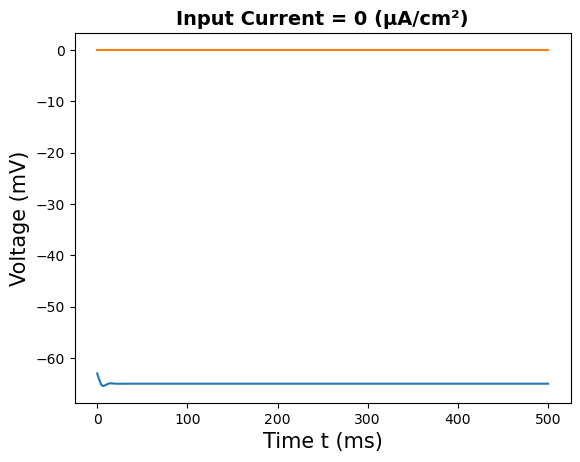

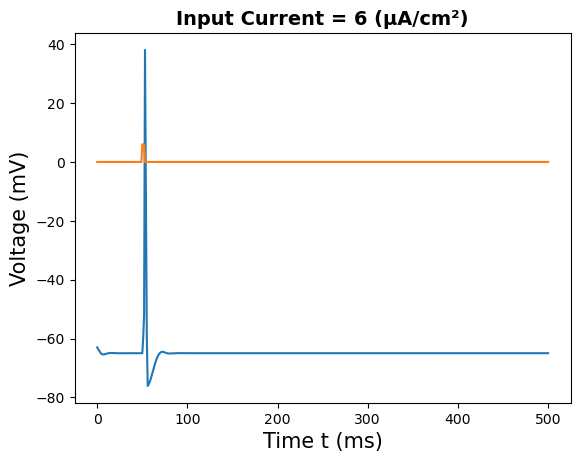

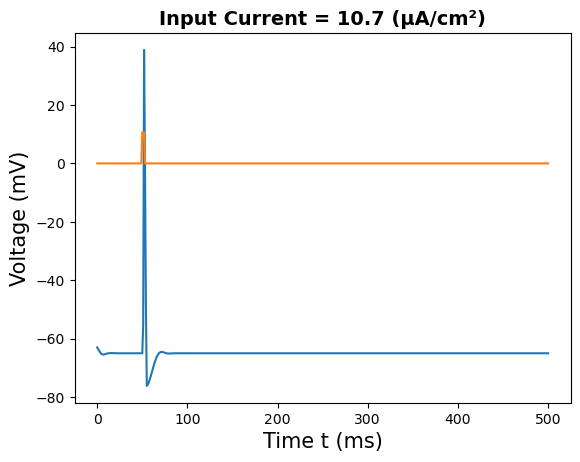

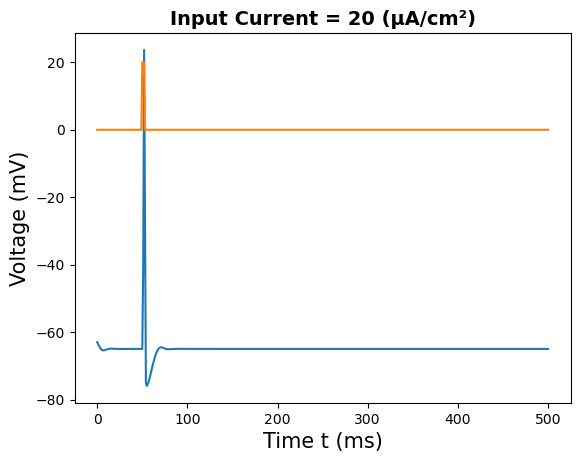

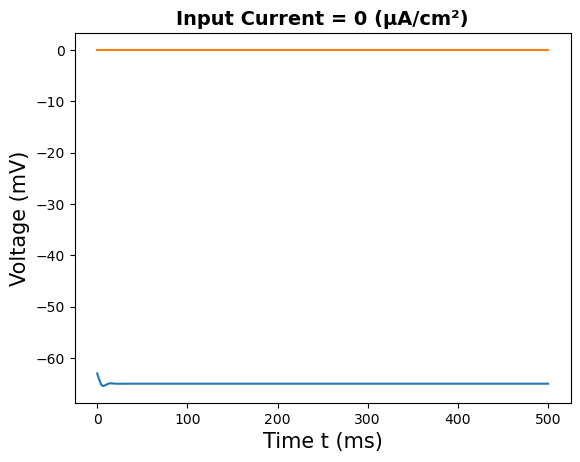

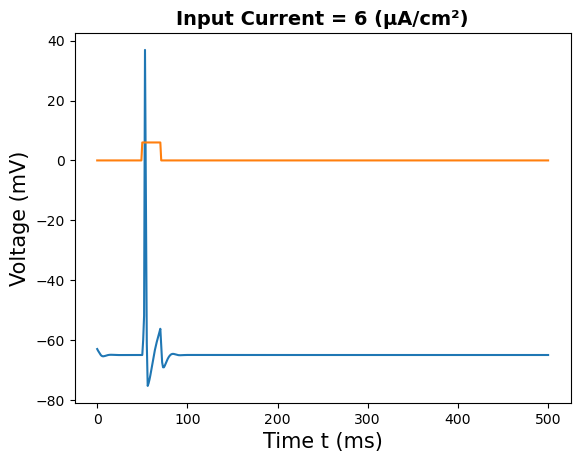

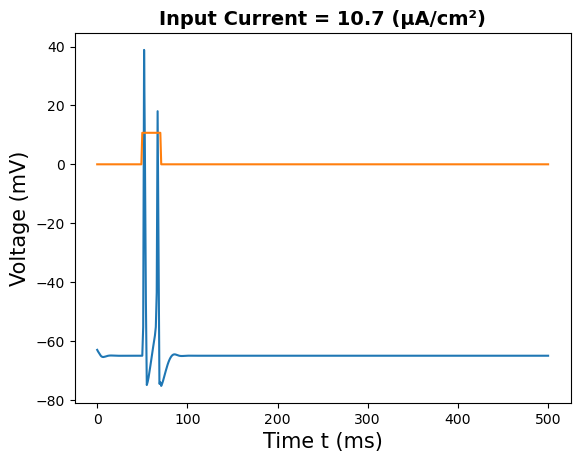

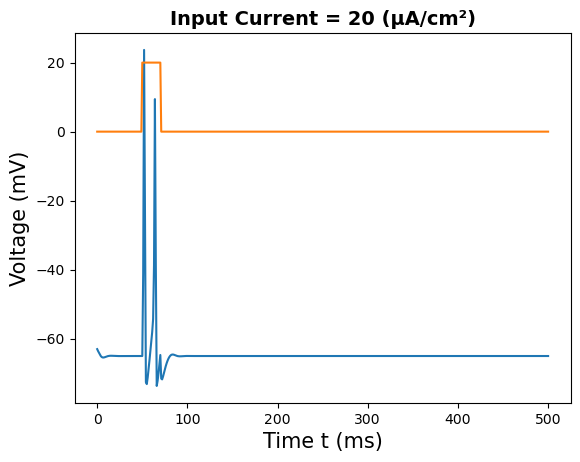

In [26]:
# TODO: Set the simulation time and current input
T_total = 500 # ms
t = np.linspace(0, T_total, T_total+1)

# Set external current amplitudes
I_current_amplitude = [0, 6, 10.7, 20] # microA/cm^2

t_current_start = 50 # input current pulse will start at this time
t_current_end   = [52, 70] # input current pulse will end at this time

# Set the initial values for V, m, n, h
initial = [-63, 0.0530, 0.31777, 0.5961]

# initialize empty array
Iapp = np.zeros_like(t)

# Solve the differential equation using odeint
# t_idx is the index of t_current_end, t0 is the value
# i.e t_idx = 0,1 and t0 = endpoint1,endpoint2 
for t_idx, t_end in enumerate(t_current_end): 
    V = []
    m = []
    n = []
    h = []
    for i_idx, i0 in enumerate(I_current_amplitude):  # loop over different amplitudes
        Iinput = [i0,t_current_start,t_end]
        # Solve the differential equation using odeint
        
        y = odeint(HHModel, initial, t, args=(Iinput,)) # integrate the values over time
        V.append(y[:,0]) # access all of the values for V
        m.append(y[:,1])
        h.append(y[:,2])
        n.append(y[:,3])

    # m represents the activation of the sodium (Na+) channels.
    # n represents the activation of the potassium (K+) channels.
    # h represents the inactivation of the sodium (Na+) channels.
    
        # This is to visualize the stimulus
        for i in range(T_total):
            if (i>= t_current_start) and (i<=t_current_end[t_idx]):
                Iapp[i] = I_current_amplitude[i_idx]
            else:
                Iapp[i] = 0

        # TODO: Plot V(t)
        plt.figure()
        plt.plot(t, V[i_idx])
        
        #TODO: Overlay with the stimulus
        plt.plot(t, Iapp)

        plt.ylabel('Voltage (mV)', fontsize=15)
        plt.xlabel('Time t (ms)', fontsize=15)
        plt.title('Input Current = {} (\u00B5A/cm\u00B2)'.format(i0), fontweight='bold', fontsize=14)

        plt.show()



## 1.1: Spike train generation
### 1.1(b) Quantitative Analysis of the threshold

#### -Simulate the Hodgkin-Huxley Model over 2ms. Use initial conditions of 

\begin{align}
V & = -63\\
m & = 0.0530\\
n & = 0.3177\\
h & = 0.5961 
\end{align}

#### What is the minimal current input that will elicit a spike? For the largest input current that *does not* elicit a spike, what is the maximal membrane potential reached? This will be your best estimate of the threshold
#### -BONUS: repeat the above for a wider input current (larger stimulus duration). Explain why the threshold is sensitive to the input pulse 

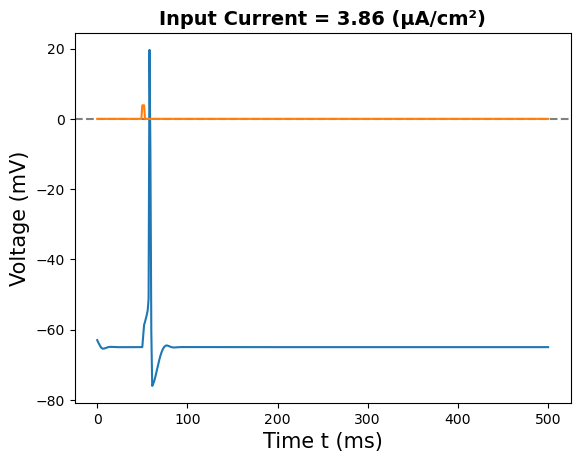

The maximal membrane potential reached
19.63003651877991


In [42]:
# TODO: Set the simulation time and current input
T_total = 500 # ms
t = np.linspace(0, T_total, T_total+1)

# TO DO: Find minimal current that will elicit a spike 
I_current =  3.86 # microA/cm^2 #TODO find min voltage

# TODO: Set the initial values for V, m, n, h
initial = [-63, 0.0530, 0.3177, 0.5961]

t_current_start = 50 # input current pulse will start at this time
t_current_end   = 52 # input current pulse will end at this time

# Solve the differential equation using odeint


Iinput = [I_current,t_current_start,t_current_end]
y = odeint(HHModel, initial, t, args=(Iinput,)) # integrate the values over time
V = (y[:,0]) # access all of the values for V
m = (y[:,1])
h = (y[:,2])
n = (y[:,3])

# This is to visualize the stimulus
for i in range(T_total):
    if (i>= t_current_start) and (i<=t_current_end):
        Iapp[i] = I_current
    else:
        Iapp[i] = 0


# TODO: Plot V(t)
plt.figure()
plt.plot(t,V)
plt.axhline(y=0, color='gray', linestyle='--')

#TODO: Overlay with the stimulus
plt.plot(t,Iapp)

plt.ylabel('Voltage (mV)', fontsize=15)
plt.xlabel('Time t (ms)', fontsize=15)
plt.title('Input Current = {} (\u00B5A/cm\u00B2)'.format(I_current), fontweight='bold', fontsize=14)

plt.show()


print("The maximal membrane potential reached")
print(np.max(V))

## 1.1: Spike train generation
### 1.1(c) Quantitative Analysis of the amplitude

#### -Simulate the Hodgkin-Huxley Model over 500ms. Use initial conditions of 

\begin{align}
V & = -63\\
m & = 0.0530\\
n & = 0.3177\\
h & = 0.5961 
\end{align}

#### Now current will be injected throughout the simulation. Find the minimal current that will generate a sustained spike train. Describe the shape of the action potential.

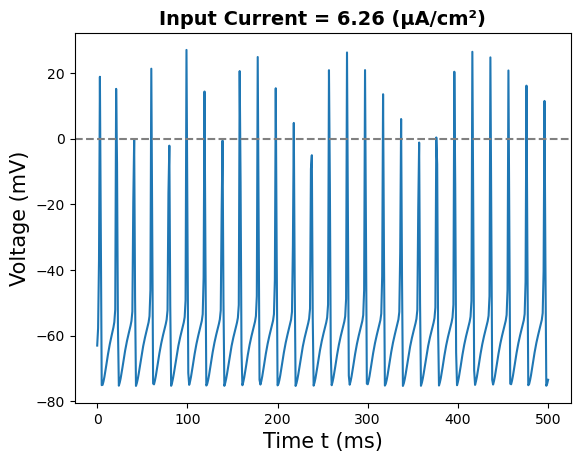

In [57]:
# TODO: Set the simulation time and current input
T_total = 500 # ms
t = np.linspace(0, T_total, T_total+1)


# TO DO: Find minimal current that will generate a sustained spike train
I_current =  6.26 # microA/cm^2
t_current_start = 0 # input current pulse will start at this time
t_current_end  = T_total # input current pulse will end at this time

# TODO: Set the initial values for V, m, n, h
initial = [-63, 0.0530, 0.3177, 0.5961]


# Solve the differential equation using odeint


Iinput = [I_current,t_current_start,t_current_end]
y = odeint(HHModel, initial, t, args=(Iinput,)) # integrate the values over time
V = (y[:,0]) # access all of the values for V
m = (y[:,1])
h = (y[:,2])
n = (y[:,3])



# TODO: Plot V(t)
plt.figure()
plt.plot(t,V)
plt.axhline(y=0, color='gray', linestyle='--')


plt.ylabel('Voltage (mV)', fontsize=15)
plt.xlabel('Time t (ms)', fontsize=15)
plt.title('Input Current = {} (\u00B5A/cm\u00B2)'.format(I_current), fontweight='bold', fontsize=14)

plt.show()

## 1.2: Firing rate vs Current
####  - Using a constant input (10) and T_total = 500, count the number of spikes in a window of fixed size.
        (Hint: you can use the find_peaks() function from scipy.signal to find when the model neuron spikes.
        Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)
#### - Plot the "F-I curve" (the firing frequency as a function of the input current). 
#### - In words, can "HH neuron" be driven at an arbitrarily high frequency?


An HH neuron cannot be driven at an arbitrarily high frequency. Inputing a higher current does not always lead to a higher frequency. If we set I_current = 200 below we can see that the frequency actually stops and we do not even see sustained peaks. (Though with sufficient accuracy and a small enough min peak height this could be true.) But the limit as we trend towards infinity is not an infinite frequency.

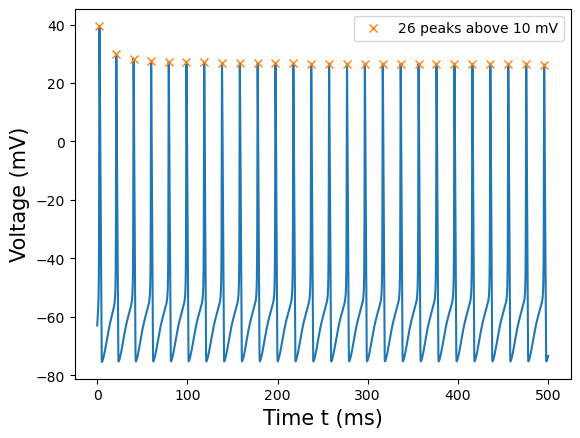

Number of peaks: 26


In [62]:
#TODO: Set T_total
T_total = 500 # ms
t = np.linspace(0, T_total, 10000)


# TO DO: Find minimal current that will generate a sustained spike train
I_current =  6.26 # microA/cm^2 
t_current_start = 0 # input current pulse will start at this time
t_current_end   = T_total # input current pulse will end at this time


# TODO: Set the initial values for V, m, n, h
initial = [-63, 0.0530, 0.3177, 0.5961]


# Solve the differential equation using odeint
t = np.linspace(0, T_total, 10000)

Iinput = [I_current,t_current_start,t_current_end]
y = odeint(HHModel, initial, t, args=(Iinput,)) # integrate the values over time
V = (y[:,0]) # access all of the values for V
m = (y[:,1])
h = (y[:,2])
n = (y[:,3])



plt.plot(t,V)
#TODO: find_peaks
peaks, _ = find_peaks(V, height = 10) #use a height of 10. Play around with height and see what happens when you change this threshold
num_peaks = len(peaks)



plt.plot(t[peaks], V[peaks], "x", label=f"{num_peaks} peaks above 10 mV")
plt.legend()
plt.ylabel('Voltage (mV)', fontsize=15) 
plt.xlabel('Time t (ms)', fontsize=15) 
plt.show()


# Counting the number of peaks
print('Number of peaks:', num_peaks)


In [63]:
import numpy as np
from scipy.integrate import odeint
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Set a range of current inputs
I_current = np.arange(1, 60, 3)
t_current_start = 0 # input current pulse will start at this time
t_current_end   = T_total # input current pulse will end at this time

# Preallocate a vector for storing the spike counts and peak amplitudes
N_spikes = np.zeros(len(I_current))

# TO DO: Set the initial values for V, m, n, h
initial = [-63, 0.0530, 0.3177, 0.5961]


T = 500

t = np.linspace(0, T, 10000)

for i in range(len(I_current)):
    Iinput = [I_current[i],t_current_start,t_current_end]
    sol = odeint(HHModel, initial, t, args=(Iinput,))
    V = sol[:,0]
    peaks, _ = find_peaks(V, 10) # Play around with height and see what happens when you change this threshold
    
    # Count the number of spikes
    N_spikes[i] = len(peaks)




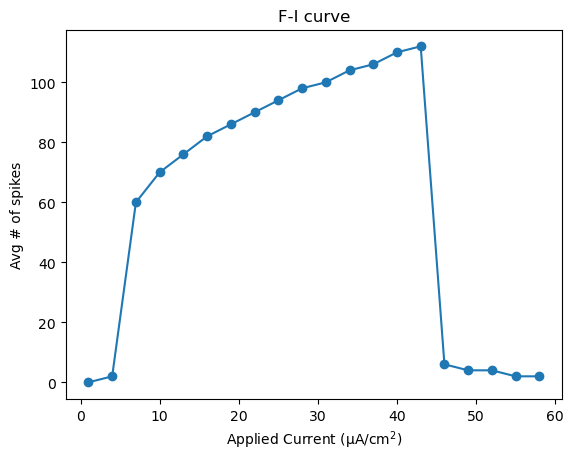

In [65]:
# TODO: plot the f-I curve
# note, divide N_spikes by T *1000
plt.plot(I_current, N_spikes/T*1000 , '-o')
plt.xlabel('Applied Current (μA/cm$^2$)')
plt.ylabel('Avg # of spikes')
plt.title("F-I curve")
plt.show()

## 1.3: Correlated Variables
####  - Use a current value of 10.  For each pair of variables V, m, n, h (6 pairs), plot one variable as a function of the other. 
#### -Identify pairs that are most strongly correlated. 
#### -How can this identification help in reducing the neuron model’s dimension? 
#### -Does the choice of current amplitude affect which pairs of variables are most correlated?

In [80]:
# Rerun the simulation for an amplitude above the spiking threshold

# Set the simulation time and current input
T = 500  # ms

# TODO: set amplitude above the spiking threshold. Does this choice affect correlation?
I_current = 10 # microA/cm^2
t_current_start = 0 # input current pulse will start at this time
t_current_end   = T_total # input current pulse will end at this time


# TODO: Set the initial values for V, m, n, h
initial = [-63, 0.0530, 0.3177, 0.5961]


# Solve the differential equation using odeint
t = np.linspace(0, T, 10000)
Iinput = [I_current,t_current_start,t_current_end]
y = odeint(HHModel, initial, t, args=(Iinput,))


# Get the V(t), m(t), n(t), h(t)
V = y[:,0]
m = y[:,1] 
n = y[:,2]
h = y[:,3]

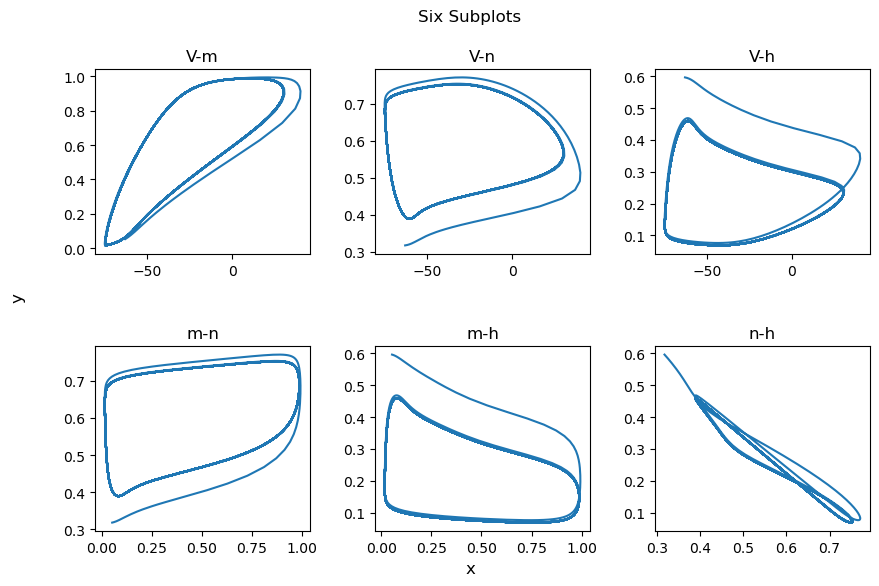

In [81]:
# TODO: Provided below is a SAMPLE of how to plot 6 plots at once. Run this code block to see the example
# Change the code to plot V-m, V-n, V-h, n-m, n-h, h-m

# Create a figure with 6 subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Plot data on each subplot
axes[0, 0].plot(V, m)
axes[0, 0].set_title('V-m')

axes[0, 1].plot(V, n)
axes[0, 1].set_title('V-n')

axes[0, 2].plot(V, h)
axes[0, 2].set_title('V-h')

axes[1, 0].plot(m, n)
axes[1, 0].set_title('m-n')

axes[1, 1].plot(m, h)
axes[1, 1].set_title('m-h')

axes[1, 2].plot(n, h)
axes[1, 2].set_title('n-h')

# Add global labels and title
fig.suptitle('Six Subplots')
fig.text(0.5, 0.04, 'x', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'y', va='center', rotation='vertical', fontsize=12)

# Adjust spacing and layout
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()


In [82]:
# Identify pairs that are most strongly correlated

# Put each variable in a dataframe
data = {'V': V, 'm': m, 'n': n, 'h': h}

# Create a dataframe using the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)

              V         m         n         h
0    -63.000000  0.053000  0.317700  0.596100
1    -62.570450  0.055688  0.318021  0.595623
2    -62.146447  0.058453  0.318405  0.595051
3    -61.726869  0.061296  0.318849  0.594384
4    -61.310517  0.064221  0.319354  0.593622
...         ...       ...       ...       ...
9995  28.225897  0.842971  0.537609  0.253034
9996  30.196322  0.888286  0.555696  0.240734
9997  30.313893  0.920685  0.573219  0.229031
9998  29.370995  0.943292  0.589876  0.217899
9999  27.816372  0.958890  0.605542  0.207314

[10000 rows x 4 columns]


In [83]:
# TODO: calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

          V         m         n         h
V  1.000000  0.904999  0.297931 -0.316458
m  0.904999  1.000000  0.590396 -0.590570
n  0.297931  0.590396  1.000000 -0.994805
h -0.316458 -0.590570 -0.994805  1.000000


##### Identify pairs that are most strongly correlated. 
V and M have a strong positive correlation
h and n have a strong negative correlation

##### How can this identification help in reducing the neuron model’s dimension? 
One reasonalbe next step might be to set V = m or n = -h. This works experiementally despite the different values of Tao.
##### Does the choice of current amplitude affect which pairs of variables are most correlated?
No. The choice of current amplitude does affect slightly the degree of correlation, but in all cases the sets of variables stated above are very strongly correlated.
